<a href="https://colab.research.google.com/github/parthnaik13/NYRA/blob/main/1_1_NYRA_EDA_general.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for NYRA Analytics
https://www.kaggle.com/competitions/big-data-derby-2022/overview

## Setup
* Mount google drive to load competition data
* Load necessary python libs and print out versions
* Set pandas df display options

In [1]:
# Mount google drive to access data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libs and print out their versions
import numpy as np
np.random.seed(7)

import pandas as pd
pd.set_option('display.max_columns', None) # Display all dataframe columns

import matplotlib
import matplotlib.pyplot as plt

print(f'numpy version - {np.__version__}')
print(f'pandas version - {pd.__version__}')
print(f'matplotlib version - {matplotlib.__version__}')

numpy version - 1.21.6
pandas version - 1.3.5
matplotlib version - 3.2.2


## NYRA start table

EDA for the NYRA start table

In [3]:
# Load the start table from the gdrive mount point
nyra_start_df = pd.read_csv('/content/drive/MyDrive/NYRA_Data/nyra_start_table.csv')
# Shape of the df
print(f'Shape of the df - {nyra_start_df.shape}')
# A look at the dataframe
nyra_start_df.head(5)

Shape of the df - (14915, 7)


,track_id,race_date,race_number,program_number,weight_carried,jockey,odds
0,AQU,2019-01-01,1,1,123,Dylan Davis,130
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150


### Column descriptions

Pulled from the competition page

Table contains data for horses/jockeys and races

* track_id - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.
* race_date - date the race took place. YYYY-MM-DD.
* race_number - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.
* program_number - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.
* weight_carried - An integer of the weight carried by the horse in the race.
* jockey - Name of the jockey on the horse in the race. 50 character max.
* odds - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1.

### Inspect & fix datatypes

In [4]:
# Look at the column dtypes for the data
nyra_start_df.dtypes

track_id          object
race_date         object
race_number        int64
program_number    object
weight_carried     int64
jockey            object
odds               int64
dtype: object

In [5]:
# Assign proper datatypes wherever necessary
# race_date as datetime col
nyra_start_df['race_date'] = pd.to_datetime(nyra_start_df['race_date'])
# race_number as a int/numeric col
nyra_start_df['race_number'] = pd.to_numeric(nyra_start_df['race_number'])

### Look at completeness of the df

In [6]:
# Look for nulls across columns
nyra_start_df.isnull().sum()

track_id          0
race_date         0
race_number       0
program_number    0
weight_carried    0
jockey            0
odds              0
dtype: int64

### Look at the data volume
* Min and max race dates
* Number of races that took place
* Distribution of those counts across race tracks
* Number of unique jockeys
* Number of unique horses competing
* Distribution of races across horses

In [30]:
# Time span for the race data
min_race_date = np.min(nyra_start_df['race_date'])
max_race_date = np.max(nyra_start_df['race_date'])

print(f'Min race date - {min_race_date}\nMax race date - {max_race_date}')

Min race date - 2019-01-01 00:00:00
Max race date - 2019-12-31 00:00:00


In [7]:
# Number of races that took place
# Grouping by track_id, race_date and counting unique race numbers
temp = nyra_start_df.groupby(['track_id', 'race_date']).agg({'race_number':'nunique'}).reset_index()
# print(temp.head(5))
total_races = sum(temp['race_number'])
print(f'Total # of races - {total_races}')

Total # of races - 2000


In [8]:
# Number of unique jockeys
temp = nyra_start_df['jockey'].nunique()
print(f'Number of unique jockeys - {temp}')

Number of unique jockeys - 178


In [9]:
# Number of unique horses (program)
temp = nyra_start_df['program_number'].nunique()
print(f'Number of unique horses - {temp}')

Number of unique horses - 20


### Race data across cuts
* Venues
* Horses
* Jockeys

In [10]:
# Distrbution of races across program_numbers (horses)
temp = nyra_start_df.groupby(['track_id', 'race_date']).agg({'race_number':'nunique'}).reset_index()
# Group by track_id and sum race_number to get counts across tracks
temp = temp.groupby('track_id').agg({'race_number' : 'sum'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_races'] = (temp['race_count'] / 2000) * 100
temp

,track_id,race_count,percent_of_races
0,AQU,825,41.25
1,BEL,772,38.60
2,SAR,403,20.15


In [11]:
# Distribution of races across horses
temp = nyra_start_df.groupby(['program_number']).agg({'race_number':'count'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_races'] = (temp['race_count'] / 2000) * 100
temp

,program_number,race_count,percent_of_races
0,1,1708,85.40
1,10,535,26.75
2,11,333,16.65
3,12,201,10.05
4,13,77,3.85
5,14,44,2.20
6,15,24,1.20
7,16,10,0.50
8,1A,164,8.20
9,1X,1,0.05


In [12]:
# Distribution of races across jockeys
temp = nyra_start_df.groupby(['jockey']).agg({'race_number':'count'}).reset_index()
temp = temp.rename(columns = {'race_number' : 'race_count'})
temp['percent_of_races'] = (temp['race_count'] / 2000) * 100
# Sort by highest race count
temp = temp.sort_values('race_count', axis = 0, ascending = False)
temp

,jockey,race_count,percent_of_races
119,Manuel Franco,1274,63.70
42,Dylan Davis,1108,55.40
96,Jose Lezcano,990,49.50
103,Junior Alvarado,852,42.60
66,Irad Ortiz Jr.,802,40.10
...,...,...,...
35,Dana G. Whitney,1,0.05
97,Jose R. Betancourt,1,0.05
28,Christophe Soumillon,1,0.05
25,Charlie Amaro,1,0.05


### Distribution of the weight carried 

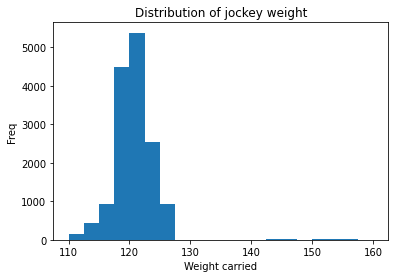

In [13]:
# Histogram for the weight carried
plt.hist(nyra_start_df['weight_carried'], bins = 20)
plt.xlabel('Weight carried')
plt.ylabel('Freq')
plt.title('Distribution of jockey weight')
plt.show()

### Exploring odds
* Convert odds to 1 (divide by 100)
* Distribution of odds
* Weight carried vs odds
* Horses having the highest avg odds
* Jockeys having the highest avg odds

Text(0.5, 1.0, 'Distribution of odds')

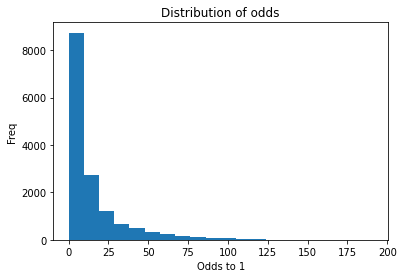

In [14]:
# Converting odds to out of 1
nyra_start_df['odds_to_1'] = nyra_start_df['odds'] / 100
plt.hist(nyra_start_df['odds_to_1'], bins = 20)
plt.xlabel('Odds to 1')
plt.ylabel('Freq')
plt.title('Distribution of odds')

  weight_bins  odds_to_1  race_number
0  (110, 115]  28.397818          825
1  (115, 117]  20.995287          679
2  (117, 120]  14.367923         6740
3  (120, 125]  13.067192         6253
4  (125, 130]  11.974052          343
5  (130, 140]   0.500000            1
6  (140, 150]  15.173171           41
7  (150, 160]   7.526562           32
8         nan  60.000000            1


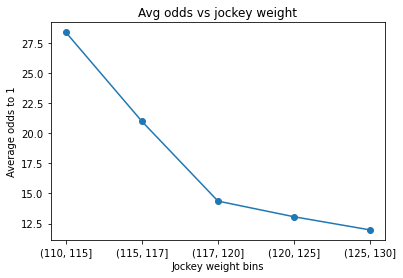

In [25]:
# Weight vs odds
# Creating weight buckets
nyra_start_df['weight_bins'] = pd.cut(nyra_start_df['weight_carried'],
                                      bins = [110, 115, 117, 120, 125, 130, 140, 150, 160])
# Convert weight_bins to str (for plotting purposes)
nyra_start_df['weight_bins'] = nyra_start_df['weight_bins'].astype(str)
# Get avg odds for jockey weight bins
temp = nyra_start_df.groupby('weight_bins').agg({'odds_to_1':'mean', 'race_number':'count'}).reset_index()
# View the df
print(temp)

# Plot weight_bins vs avg odds_to_1
plt.plot(temp['weight_bins'][:5], temp['odds_to_1'][:5], 'o-')
plt.xlabel('Jockey weight bins')
plt.ylabel('Average odds to 1')
plt.title('Avg odds vs jockey weight')
plt.show()

In [26]:
# Horses having highest avg odds
temp = nyra_start_df.groupby('program_number').agg({'odds_to_1':'mean'}).reset_index()
temp = temp.rename(columns = {'odds_to_1':'avg_odds'})
temp = temp.sort_values('avg_odds', axis = 0, ascending = False)
temp.head(10)

,program_number,avg_odds
4,13,22.370779
3,12,21.719652
5,14,20.964773
6,15,20.452083
1,10,20.425888
2,11,19.639790
9,1X,19.300000
19,9,18.086137
18,8,16.569231
16,6,15.243523


In [27]:
# Jockeys having highest avg odds
temp = nyra_start_df.groupby('jockey').agg({'odds_to_1':'mean'}).reset_index()
temp = temp.rename(columns = {'odds_to_1':'avg_odds'})
temp = temp.sort_values('avg_odds', axis = 0, ascending = False)
temp.head(10)

,jockey,avg_odds
58,Gavin Coetzee,84.000000
122,Martin Chuan,78.000000
143,Robbie G. Davis,74.625000
159,Talbert Howell,73.589286
10,Angel Cruz,73.000000
89,Jose A. Bracho,70.687500
162,Tomas B. Mejia,69.850000
32,Cristina Bonilla,67.150000
112,Leonardo Corujo,64.062500
27,Christian Santiago Reyes,61.125000


### EDA summary for NYRA start table

# End of notebook